In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# kmeans
from sklearn.cluster import KMeans

# cluster hierarchy
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# import DBSCAN
from sklearn.cluster import DBSCAN

# visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

loaded_cust_data = pd.read_csv('data/twm_customer.csv', sep=';')
cust_data = pd.read_csv('data/twm_customer.csv', sep=';')
cust_data.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [2]:
cust_data['gen_num'] = cust_data['gender'].replace({'M ':0, 'F ':1})

In [3]:
cust_data['income_(10k)'] = cust_data['income'] / 10000
cust_data['age_decades'] = cust_data['age'] / 10


In [4]:
cust_data.head(5)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,gen_num,income_(10k),age_decades
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,0,2.6150,4.6
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,0,0.6605,7.1
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,1,1.8548,3.8
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,1,4.7668,5.4
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,1,4.4554,5.9


## Switch out marital_status

In [5]:
cust_data['marital_status'] = cust_data.marital_status.replace({1 : 'A',
                                                     2 : 'B', 
                                                     3 : 'C', 4 : 'D' 
                                                    })
cat_feats = ['marital_status']
cust_dummy = pd.get_dummies(cust_data[cat_feats])
cust_dummy
# cust_dummy.drop(['marital_status_C', 'marital_status_D'], inplace = True, axis=1)
cust_data = pd.concat([cust_data, cust_dummy], axis=1)
cust_data

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,gen_num,income_(10k),age_decades,marital_status_A,marital_status_B,marital_status_C,marital_status_D
0,1362691,26150,46,5,1,M,B,,Donald ...,Marek ...,...,89194,Las Vegas,NV,0,2.6150,4.6,0,1,0,0
1,1362487,6605,71,1,0,M,B,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,0,0.6605,7.1,0,1,0,0
2,1363160,18548,38,8,0,F,A,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,1,1.8548,3.8,1,0,0,0
3,1362752,47668,54,3,0,F,A,,Lisa ...,Martin ...,...,90172,Los Angeles,CA,1,4.7668,5.4,1,0,0,0
4,1362548,44554,59,9,2,F,D,,Barbara ...,O'Malley ...,...,10138,New York City,NY,1,4.4554,5.9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,D,,Lillian ...,Kaufman ...,...,90016,Los Angeles,CA,1,1.4795,3.6,0,0,0,1
743,1362895,26387,56,6,1,M,B,,Marty ...,McSherry ...,...,10126,New York City,NY,0,2.6387,5.6,0,1,0,0
744,1362569,61300,50,0,2,M,B,,Ken ...,Lawrence ...,...,87194,Albuquerque,NM,0,6.1300,5.0,0,1,0,0
745,1363364,15100,37,7,0,F,B,,Debbie ...,Runner ...,...,35241,Birmingham,AL,1,1.5100,3.7,0,1,0,0


In [6]:
columns = ['years_with_bank', 'nbr_children', 'marital_status_A', 'marital_status_B', 'gen_num', 'income', 'age']
# graph_data = pd.DataFrame(cust_data, columns=columns)
graph_data = cust_data[['years_with_bank', 'nbr_children', 'marital_status_A', 'marital_status_B', 'marital_status_C', 'marital_status_D','gen_num', 'income', 'age']]
graph_data.head()

,years_with_bank,nbr_children,marital_status_A,marital_status_B,marital_status_C,marital_status_D,gen_num,income,age
0,5,1,0,1,0,0,0,26150,46
1,1,0,0,1,0,0,0,6605,71
2,8,0,1,0,0,0,1,18548,38
3,3,0,1,0,0,0,1,47668,54
4,9,2,0,0,0,1,1,44554,59


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

data_sub = pd.DataFrame(scaler.fit_transform(graph_data), columns=graph_data.columns)
data_sub.head()

,years_with_bank,nbr_children,marital_status_A,marital_status_B,marital_status_C,marital_status_D,gen_num,income,age
0,0.408539,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,0.154185,0.184312
1,-1.087435,-0.648298,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,-0.726524,1.493070
2,1.530520,-0.648298,1.306339,-0.946541,-0.262049,-0.321555,0.887176,-0.188366,-0.234490
3,-0.339448,-0.648298,1.306339,-0.946541,-0.262049,-0.321555,0.887176,1.123798,0.603115
4,1.904514,1.165479,-0.765498,-0.946541,-0.262049,3.109892,0.887176,0.983479,0.864867


In [8]:
# graph_data.head()

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [10]:
data_new = data_sub.drop('years_with_bank', axis=1)

In [11]:
# data_new['marital_status']

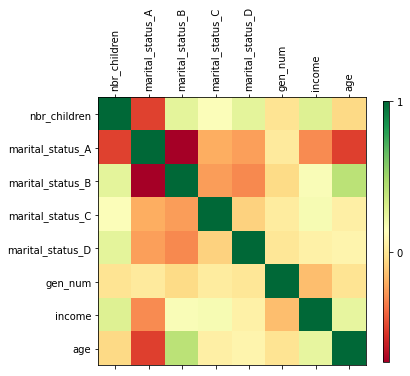

In [12]:
plot_corr(data_new, size=6)

## Hierarhical Clustering

In [13]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

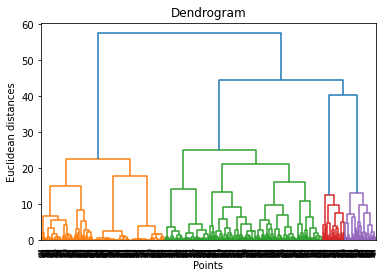

In [14]:
import scipy.cluster.hierarchy as sch
plot_dendrogram(data_new)

In [15]:
import plotly.express as px


In [16]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X.iloc[y_res == cluster,0]
        y = X.iloc[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

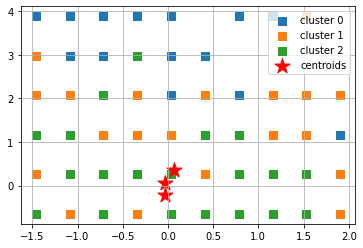

In [17]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

y_hc = ac.fit_predict(graph_data)
plot_clusters(data_sub,y_hc, plt_cluster_centers=True)



## K-means

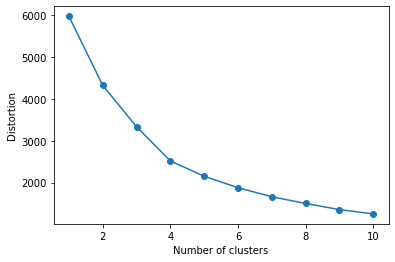

In [18]:
from sklearn.cluster import KMeans

X= data_new

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
    
plot_distortion(X,max_clusters=10)

In [30]:
kmeans = KMeans(n_clusters=3)
c_y_km = kmeans.fit_predict(data_sub)

## PCA chart

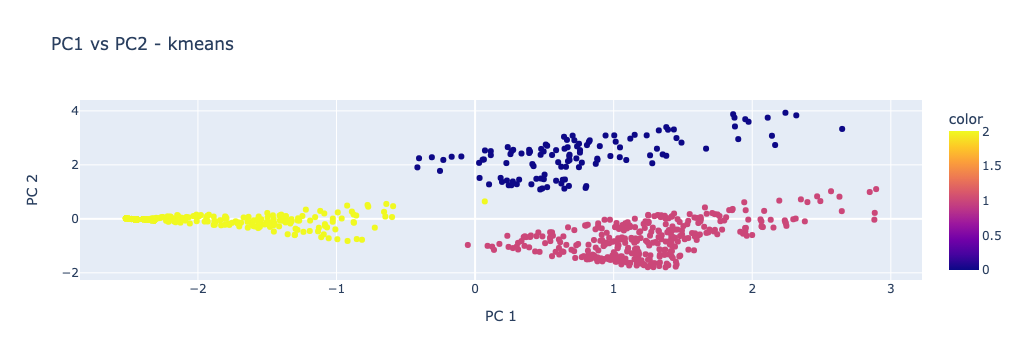

In [185]:
X = data_new

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.rcParams["figure.figsize"] = (3,3)
fig = px.scatter(
    components, x=0, y=1, color=c_y_km,
    title=f'PC1 vs PC2 - kmeans',
    labels={'0': 'PC 1', '1': 'PC 2'}
)

fig.show()

In [32]:
# LOADING PLOT

X =  data_new
features = X.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

df_loading = pd.DataFrame(loadings, columns=('PC1','PC2'), index = X.columns)

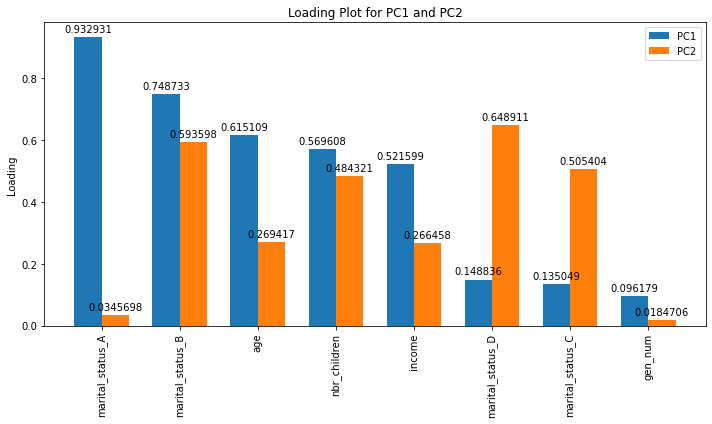

In [33]:
# plot PC1
df_loading_abs = df_loading.abs().sort_values(by = 'PC1', ascending = False).head(10)

df_loading_T = df_loading_abs.T

labels = df_loading_T.columns
PC1 = df_loading_T.loc['PC1']
PC2 = df_loading_T.loc['PC2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width/2, PC1, width, label='PC1')
rects2 = ax.bar(x + width/2, PC2, width, label='PC2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loading')
ax.set_title('Loading Plot for PC1 and PC2')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

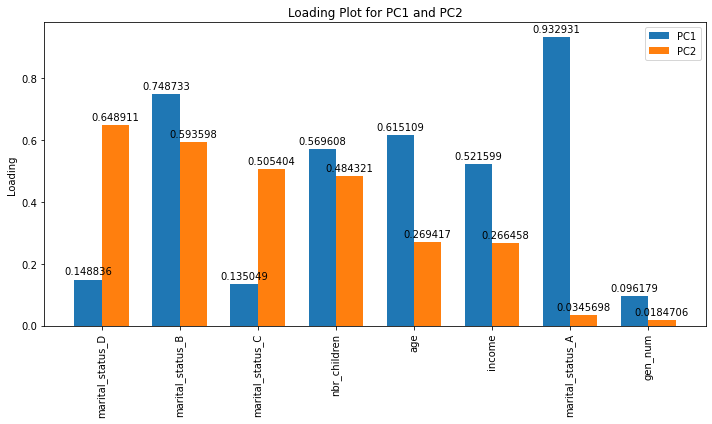

In [34]:
# plot PC2
df_loading_abs = df_loading.abs().sort_values(by = 'PC2', ascending = False).head(10)
df_loading_T = df_loading_abs.T

labels = df_loading_T.columns
PC1 = df_loading_T.loc['PC1']
PC2 = df_loading_T.loc['PC2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width/2, PC1, width, label='PC1')
rects2 = ax.bar(x + width/2, PC2, width, label='PC2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loading')
ax.set_title('Loading Plot for PC1 and PC2')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [35]:
import plotly.graph_objects as go

def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

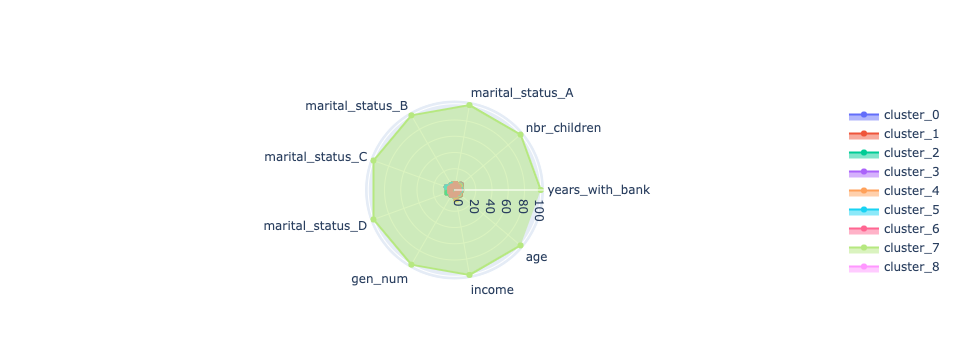

In [36]:
plot_radar_chart(data_sub)

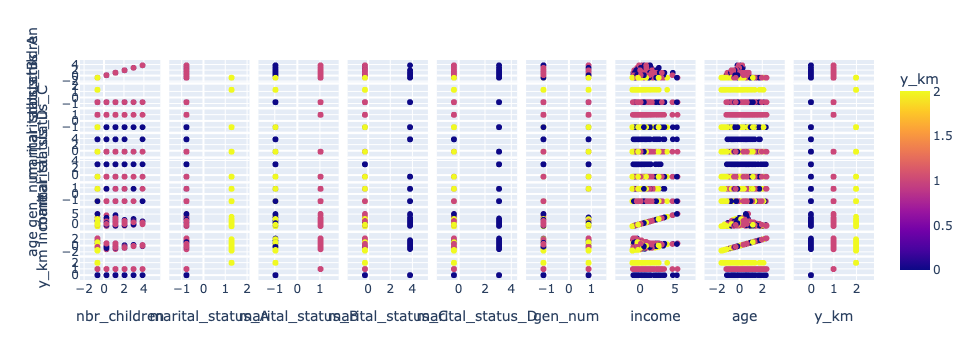

In [37]:
data_new_y = data_new.copy()
data_new_y['y_km'] = c_y_km
fig = px.scatter_matrix(data_new_y, color='y_km')
fig.show()

In [38]:
from sklearn.decomposition import PCA




In [39]:
data_new_y['y_km'] = c_y_km
data_new_y.head()

,nbr_children,marital_status_A,marital_status_B,marital_status_C,marital_status_D,gen_num,income,age,y_km
0,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,0.154185,0.184312,1
1,-0.648298,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,-0.726524,1.493070,1
2,-0.648298,1.306339,-0.946541,-0.262049,-0.321555,0.887176,-0.188366,-0.234490,2
3,-0.648298,1.306339,-0.946541,-0.262049,-0.321555,0.887176,1.123798,0.603115,2
4,1.165479,-0.765498,-0.946541,-0.262049,3.109892,0.887176,0.983479,0.864867,0


In [40]:
result = data_new_y.groupby('y_km').mean().divide(data_new.drop('y_km',axis=1).mean())*100

KeyError: "['y_km'] not found in axis"

In [41]:
plot_radar_chart(result)

NameError: name 'result' is not defined

### Compare groups

In [120]:
# data_new_y.y_km.unique()
data_y = graph_data.copy()
data_y['y_km'] = c_y_km
# 

clust0 = (data_y[data_y['y_km'] == 0])
clust1 = data_y[data_y['y_km'] == 1]
clust2 = data_y[data_y['y_km'] == 2]
# clust3 = data_y[data_y['y_km'] == 3]
# clust4 = data_y[data_y['y_km'] == 4]

cluster = [clust0, clust1, clust2]

# mean, median, sum, min, max
# cluster_metrics['avg_years_with_bank'] =

avg_years_with_bank=[]
avg_nbr_children=[]
avg_gen_num =[]
avg_income =[]
med_income=[]
avg_age =[]
med_age=[]
avg_ms_a=[]
avg_ms_b=[]
avg_ms_c=[]
avg_ms_d=[]
total=[]


for i in range(3):
    avg_years_with_bank.append(np.mean(cluster[i].years_with_bank))
    avg_nbr_children.append(np.mean(cluster[i].nbr_children))
    avg_gen_num.append(np.mean(cluster[i].gen_num))
    avg_income.append(np.mean(cluster[i].income))
    med_income.append(np.median(cluster[i].income))
    avg_age.append(np.mean(cluster[i].age))
    med_age.append(np.median(cluster[i].age))
    avg_ms_a.append(np.mean(cluster[i].marital_status_A))
    avg_ms_b.append(np.mean(cluster[i].marital_status_B))
    avg_ms_c.append(np.mean(cluster[i].marital_status_C))
    avg_ms_d.append(np.mean(cluster[i].marital_status_D))
    total.append(cluster[i].size)

data = {'avg_years_with_bank': avg_years_with_bank,
        'avg_nbr_children': avg_nbr_children,
        'avg_gen_num' :avg_gen_num,
        'avg_income' : avg_income,
        'med_income': med_income,
        'avg_age' :avg_age,
        'med_age': med_age,
        'avg_ms_a': avg_ms_a,
        'avg_ms_b': avg_ms_b,
        'avg_ms_c': avg_ms_c,
        'avg_ms_d': avg_ms_d,
        'total': total
        }
cluster_compare = pd.DataFrame(data)
cluster_compare

,avg_years_with_bank,avg_nbr_children,avg_gen_num,avg_income,med_income,avg_age,med_age,avg_ms_a,avg_ms_b,avg_ms_c,avg_ms_d,total
0,3.661017,1.491525,0.593220,31207.669492,22476.0,46.957627,44.0,0.0,0.0,0.40678,0.59322,1180
1,4.065156,1.014164,0.535411,26587.439093,21384.0,50.796034,52.0,0.0,1.0,0.00000,0.00000,3530
2,3.811594,0.000000,0.576087,14167.228261,7622.0,29.927536,19.0,1.0,0.0,0.00000,0.00000,2760


In [ ]:
# PLOT*********************** 

# Accounts

In [138]:
accounts = pd.read_csv("data/twm_accounts.csv", sep=';')
checking_acct = pd.read_csv("data/twm_checking_acct.csv", sep=';')
checking_tran = pd.read_csv("data/twm_checking_tran.csv", sep=';')
credit_acct = pd.read_csv("data/twm_credit_acct.csv", sep=';')

savings_acct = pd.read_csv("data/twm_savings_acct.csv", sep=';')
savings_tran = pd.read_csv("data/twm_savings_tran.csv", sep=';')
transactions = pd.read_csv("data/twm_transactions.csv", sep=';')

In [139]:
accounts.sort_values('cust_id').head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
1399,13624803,1362480,SV,Y,23.12.1992,NaN,707.09,1187.97
1012,13624802,1362480,CK,Y,23.12.1992,NaN,331.85,86.86
1217,4561143213624800,1362480,CC,N,23.12.1992,15.12.1995,1607.40,20.00
252,13624842,1362484,CK,Y,2.1.1993,NaN,2613.46,95.32
677,13624843,1362484,SV,Y,2.1.1993,NaN,194.76,2122.17


In [ ]:
# accounts.acct_type == 'SV  ' & 

In [86]:
accounts_copy = accounts

accounts_copy = accounts_copy.drop_duplicates(subset=['cust_id'])

accounts_copy.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [141]:
accounts_copy['is_saver'] = accounts_copy['acct_type'].replace({'SV  ':1,'CC  ':0,'CK  ':0})
accounts_copy['save_act'] = accounts_copy.account_active.replace({'Y ':1, 'N ':0})
accounts_copy['active_saver'] = accounts_copy.is_saver + accounts_copy.save_act
accounts_copy.active_saver = accounts_copy.active_saver.replace({1:0, 2:1})
accounts_copy.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,is_saver,save_act,active_saver
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,1,1,1
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,0,1,0
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,0,1,0
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0,1,0
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,0,1,0


In [88]:
checking_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [89]:
checking_tran.groupby('cust_id').count()

,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
cust_id,,,,,,,,,
1362480,99,99,99,99,99,99,99,99,99
1362484,99,99,99,99,99,99,99,99,99
1362485,99,99,99,99,99,99,99,99,99
1362486,25,25,25,25,25,25,25,25,25
1362487,52,52,52,52,52,52,52,52,52
...,...,...,...,...,...,...,...,...,...
1363483,99,99,99,99,99,99,99,99,99
1363484,99,99,99,99,99,99,99,99,99
1363492,99,99,99,99,99,99,99,99,99


In [90]:
len(checking_tran)

46204

In [142]:
savers = accounts[(accounts.acct_type == 'SV  ') & (accounts.account_active == 'Y ')]
savers.groupby('acct_nbr').mean()

,cust_id,starting_balance,ending_balance
acct_nbr,,,
13624803,1362480,707.09,1187.97
13624843,1362484,194.76,2122.17
13624863,1362486,284.48,116.24
13624893,1362489,760.24,373.65
13624963,1362496,247.34,251.06
...,...,...,...
13634823,1363482,121.85,486.40
13634853,1363485,155.40,157.76
13634903,1363490,2267.29,2301.53


In [92]:
savers['amt_saved'] = savers.ending_balance - savers.starting_balance

/var/folders/q4/f3xj1m3j2h3fl1lc7921wysh0000gn/T/ipykernel_68849/1187341897.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
average_saved = savers['amt_saved'].mean()
average_saved

374.9697066666667

In [94]:
savers = savers[['cust_id', 'amt_saved']]
savers.head()

,cust_id,amt_saved
0,1362806,-1145.64
13,1363377,1171.15
15,1362940,613.16
20,1362823,63.71
27,1363078,468.57


In [95]:
transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [96]:
df = checking_tran[['tran_amt', 'cust_id']].groupby(by=['cust_id'], as_index=False ).count()


my_filter = checking_tran[['tran_amt', 'cust_id']].groupby(by=['cust_id'], as_index=False ).mean()
df['avg_trans'] = my_filter['tran_amt']
df['credit_debt'] = 0
df['credit_debt'] = credit_acct['starting_balance']-credit_acct['ending_balance']
df

,cust_id,tran_amt,avg_trans,credit_debt
0,1362480,99,-2.474646,370.77
1,1362484,99,-25.435758,-1548.23
2,1362485,99,-1.659495,6896.57
3,1362486,25,-37.604800,2302.14
4,1362487,52,-26.513269,-1000.00
...,...,...,...,...
515,1363483,99,2.617273,NaN
516,1363484,99,-23.918283,NaN
517,1363492,99,-12.570404,NaN
518,1363493,99,-41.110505,NaN


In [97]:
account_copy = pd.merge(accounts_copy, df, how = 'inner', on=['cust_id'])
account_copy.drop(['is_saver', 'save_act'],axis=1, inplace=True)
account_copy = account_copy.rename(columns={'tran_amt': 'ck_trans_count', 'avg_trans': 'ck_avg_trans'})





In [98]:
account_copy.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,active_saver,ck_trans_count,ck_avg_trans,credit_debt
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,1,99,23.664343,-2000.00
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,0,99,-20.890303,2026.85
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,0,99,-2.146465,-1567.71
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0,99,-101.501717,-2648.63
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,0,99,-36.654646,-1200.00


In [99]:
account_copy = pd.merge(account_copy, savers, how='inner', on='cust_id')


In [61]:
account_copy.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,active_saver,ck_trans_count,ck_avg_trans,credit_debt,amt_saved
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,1,99,23.664343,-2000.00,-1145.64
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,0,99,-20.890303,2026.85,783.05
2,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0,99,-101.501717,-2648.63,-337.05
3,4561143213633270,1363327,CC,Y,2.4.1995,NaN,0.00,3000.00,0,99,-23.973333,-183.89,123.38
4,4561143213632370,1363237,CC,N,24.1.1993,30.1.1995,8649.37,0.00,0,99,-75.026364,1413.94,11.25


In [100]:
final_df = account_copy[['active_saver', 'ck_trans_count', 'ck_avg_trans', 'credit_debt', 'amt_saved']]
final_df.head()

,active_saver,ck_trans_count,ck_avg_trans,credit_debt,amt_saved
0,1,99,23.664343,-2000.00,-1145.64
1,0,99,-20.890303,2026.85,783.05
2,0,99,-101.501717,-2648.63,-337.05
3,0,99,-23.973333,-183.89,123.38
4,0,99,-75.026364,1413.94,11.25


In [162]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()


data_final = pd.DataFrame(scaler.fit_transform(final_df), columns=final_df.columns)
data_final.credit_debt.fillna(0, inplace=True)
data_final.head()

,active_saver,ck_trans_count,ck_avg_trans,credit_debt,amt_saved
0,2.507882,0.498402,1.503380,-0.872480,-1.376755
1,-0.398743,0.498402,-0.206588,0.920253,0.362267
2,-0.398743,0.498402,-3.300381,-1.161247,-0.647682
3,-0.398743,0.498402,-0.324911,-0.063957,-0.232531
4,-0.398743,0.498402,-2.284281,0.647389,-0.333634


In [163]:
data_final.isnull().sum()

active_saver      0
ck_trans_count    0
ck_avg_trans      0
credit_debt       0
amt_saved         0
dtype: int64

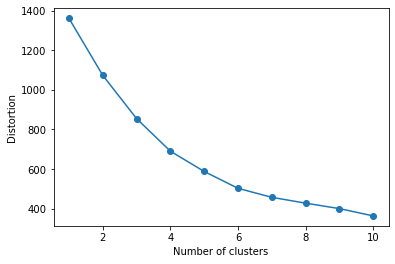

In [178]:
from sklearn.cluster import KMeans

X= data_final

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
    
plot_distortion(X,max_clusters=10)

In [164]:
kmeans = KMeans(n_clusters=4)

a_y_km = kmeans.fit_predict(data_final)

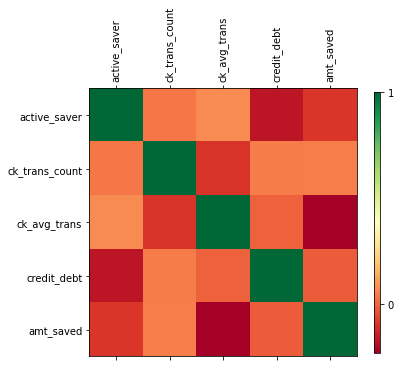

In [165]:
plot_corr(final_df, size=6)

## Add back in the y to map correlation

In [166]:
data_final_y = data_final.copy()
data_final_y['y_km'] = a_y_km 
data_final_y.head()

,active_saver,ck_trans_count,ck_avg_trans,credit_debt,amt_saved,y_km
0,2.507882,0.498402,1.503380,-0.872480,-1.376755,2
1,-0.398743,0.498402,-0.206588,0.920253,0.362267,1
2,-0.398743,0.498402,-3.300381,-1.161247,-0.647682,1
3,-0.398743,0.498402,-0.324911,-0.063957,-0.232531,1
4,-0.398743,0.498402,-2.284281,0.647389,-0.333634,1


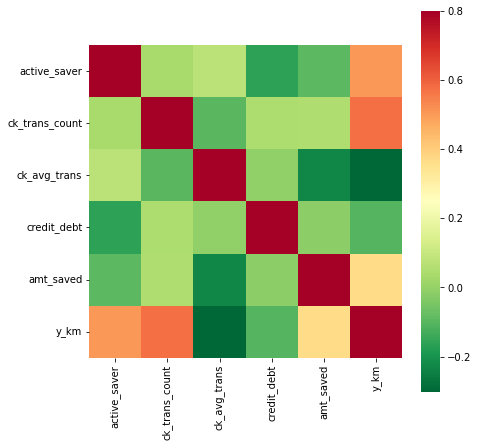

In [167]:
corrmat = data_final_y.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r");

### Plot correlation - note this below doesn't work as they are all binned into scatter groups

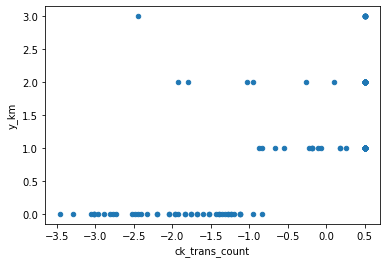

In [168]:
var = 'ck_trans_count'
data = data_final_y[['y_km',var]]

data.plot.scatter(x=var, y='y_km');

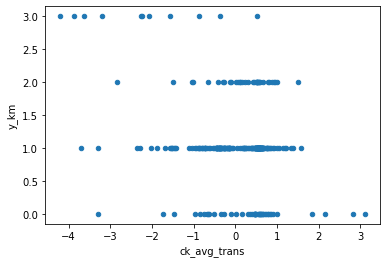

In [169]:
var = 'ck_avg_trans'
data = data_final_y[['y_km',var]]

data.plot.scatter(x=var, y='y_km');

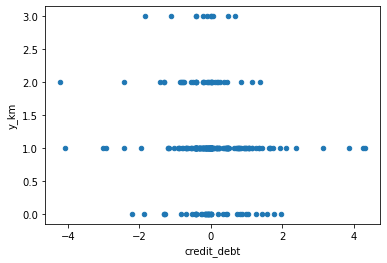

In [170]:
var = 'credit_debt'
data = data_final_y[['y_km',var]]

data.plot.scatter(x=var, y='y_km');

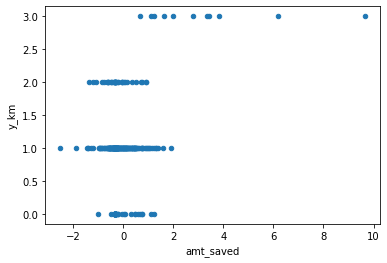

In [171]:
var = 'amt_saved'
data = data_final_y[['y_km',var]]

data.plot.scatter(x=var, y='y_km');

In [172]:
data_final['y_km'] = a_y_km
data_final.drop('y_km', axis=1, inplace=True)


### PCA Plot

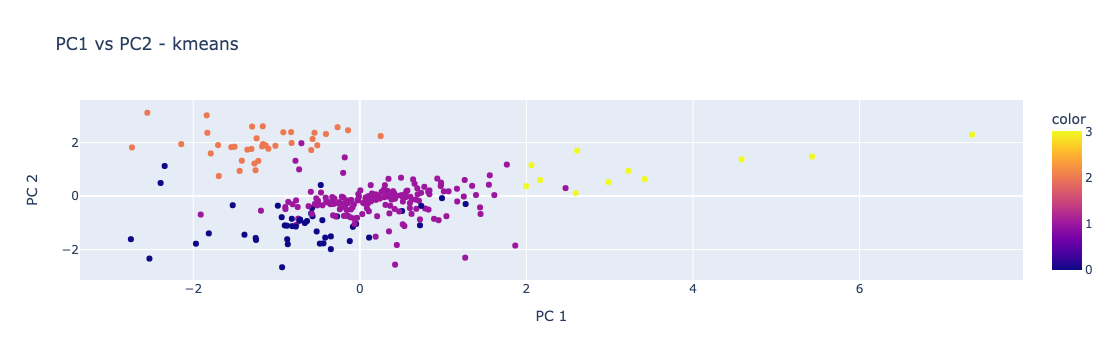

In [173]:
X = data_final

pca = PCA(n_components=2)
components = pca.fit_transform(X)


fig = px.scatter(
    components, x=0, y=1, color=a_y_km,
    title=f'PC1 vs PC2 - kmeans',
    labels={'0': 'PC 1', '1': 'PC 2'}
)

fig.show()

##### LOADING PLOT

In [174]:

# loadings
X = data_final
features = X.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

df_loading = pd.DataFrame(loadings, columns=('PC1','PC2'), index = X.columns)

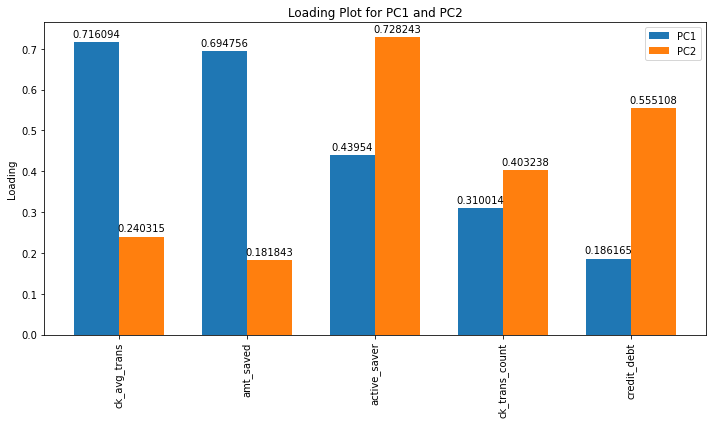

In [175]:
# plot PC1
df_loading_abs = df_loading.abs().sort_values(by = 'PC1', ascending = False).head(10)

df_loading_T = df_loading_abs.T

labels = df_loading_T.columns
PC1 = df_loading_T.loc['PC1']
PC2 = df_loading_T.loc['PC2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width/2, PC1, width, label='PC1')
rects2 = ax.bar(x + width/2, PC2, width, label='PC2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loading')
ax.set_title('Loading Plot for PC1 and PC2')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

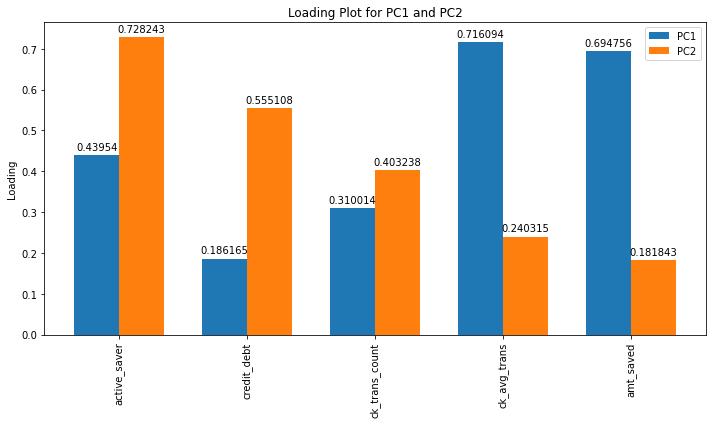

In [176]:
# plot PC2
df_loading_abs = df_loading.abs().sort_values(by = 'PC2', ascending = False).head(10)
df_loading_T = df_loading_abs.T

labels = df_loading_T.columns
PC1 = df_loading_T.loc['PC1']
PC2 = df_loading_T.loc['PC2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width/2, PC1, width, label='PC1')
rects2 = ax.bar(x + width/2, PC2, width, label='PC2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loading')
ax.set_title('Loading Plot for PC1 and PC2')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Radar Plot

In [112]:
result1 = data_final_y.groupby('y_km').mean().divide(data_final_y.drop('y_km',axis=1).mean())*100

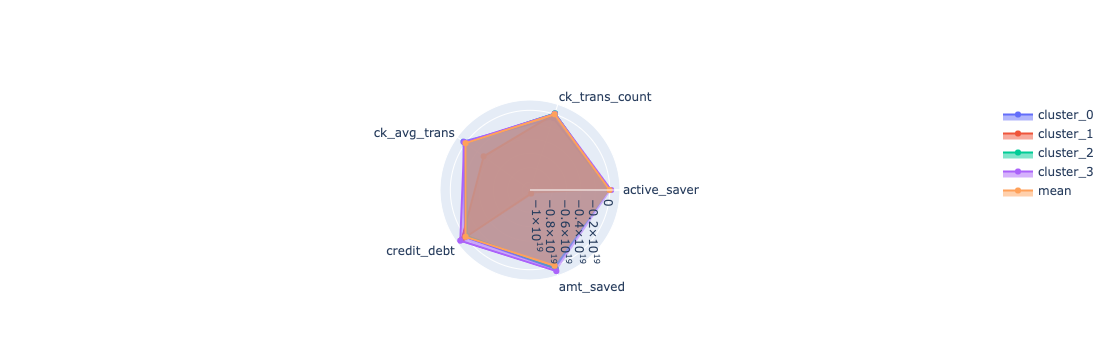

In [113]:
plot_radar_chart(result1)

### Look at metrics between clusters

In [177]:
# Using "readable" (unscaled) data

acc_data_y = final_df.copy()
acc_data_y['y_km'] = a_y_km
# 

a_clust0 = acc_data_y[acc_data_y['y_km'] == 0]
a_clust1 = acc_data_y[acc_data_y['y_km'] == 1]
a_clust2 = acc_data_y[acc_data_y['y_km'] == 2]
a_clust3 = acc_data_y[acc_data_y['y_km'] == 3]


cluster = [a_clust0, a_clust1, a_clust2, a_clust3, a_clust4]

# # mean, median, sum, min, max


avg_active_saver=[]
avg_ck_trans_count=[]
avg_ck_avg_trans =[]
avg_credit_debt =[]
avg_amt_saved=[]
med_amt_saved=[]
count_savers=[]
total = []



for i in range(4):
    avg_active_saver.append(np.mean(cluster[i].active_saver))
    avg_ck_trans_count.append(np.mean(cluster[i].ck_trans_count))
    avg_ck_avg_trans.append(np.mean(cluster[i].ck_avg_trans))
    avg_credit_debt.append(np.mean(cluster[i].credit_debt))
    avg_amt_saved.append(np.mean(cluster[i].amt_saved))
    med_amt_saved.append(np.median(cluster[i].amt_saved))
 
    total.append(cluster[i].size)

data = {'avg_active_saver': avg_active_saver,
        'avg_ck_trans_count': avg_ck_trans_count,
        'avg_ck_avg_trans' :avg_ck_avg_trans,
        'avg_credit_debt' : avg_credit_debt,
        'avg_amt_saved': avg_amt_saved,
#         'med_amt_saved': med_amt_saved,
        'total': total
        
        }
acc_cluster_compare = pd.DataFrame(data)
acc_cluster_compare

,avg_active_saver,avg_ck_trans_count,avg_ck_avg_trans,avg_credit_debt,avg_amt_saved,total
0,0.042553,37.595745,-7.268917,-51.366591,244.891489,282
1,0.000000,97.677596,-15.082739,183.062952,251.293552,1098
2,1.000000,92.888889,-11.210599,-949.709091,114.458333,216
3,0.000000,92.363636,-71.837510,-696.593000,3999.556364,66


In [137]:
a_clust1['amt_saved']

16      4180.82
64      3472.81
65      7234.57
104     1765.95
125    11079.85
133     2187.29
165     4107.40
176     1613.27
228     4634.66
235     2595.78
256     1122.72
Name: amt_saved, dtype: float64

acct_nbr             13625932
cust_id               1362593
acct_type                CK  
account_active             Y 
acct_start_date     22.8.1995
acct_end_date             NaN
starting_balance      4116.15
ending_balance         168.63
Name: 125, dtype: object

In [ ]:
# Maybe plot this out 

In [ ]:
# Maybe plot for each cluster, plot other clusterfor each cust_id - see if there is a link 
# between ie demographics and banking behaviour


## Add 2 clustering groups together.... 

In [122]:
# accounts data - Assumption didn't drop any rows or reorder
acc_data_y['cust_id'] = account_copy['cust_id']
new_acc_data_y = acc_data_y.rename(columns={'y_km': 'a_y_km'})

# customer data Assumption - didn't drop any rows or reorder
data_y['cust_id']= loaded_cust_data['cust_id']
new_cust_data_y = data_y.rename(columns={'y_km': 'c_y_km'})


In [123]:
combined_acc_cust = pd.merge(new_acc_data_y,new_cust_data_y, how = 'inner', on=['cust_id'])
combined_acc_cust[['a_y_km', 'c_y_km']]

,a_y_km,c_y_km
0,3,0
1,2,1
2,2,1
3,2,2
4,2,1
...,...,...
272,2,1
273,2,0
274,2,2
275,2,0


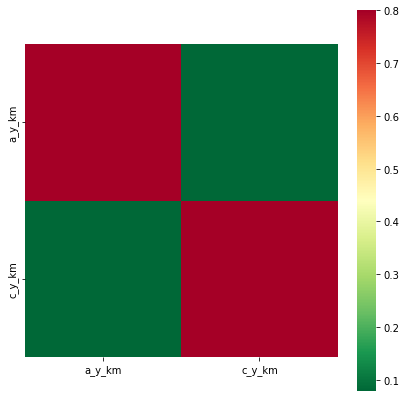

In [124]:
plot_combined = combined_acc_cust[['a_y_km', 'c_y_km']]
corrmat = plot_combined.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r");

In [127]:
# my_filter = combined_acc_cust[['c_y_km', 'a_y_km']].groupby(by=['c_y_km'], as_index=False ).count()

# am I doing this wrong??
cluster_count = combined_acc_cust[['c_y_km', 'a_y_km', 'age']].groupby(by=['c_y_km','a_y_km'], as_index=False ).count()
cluster_count = cluster_count.rename(columns={'age': 'account_cluster_count'})
# cluster_count.head()
cluster_count

,c_y_km,a_y_km,account_cluster_count
0,0,0,14
1,0,1,3
2,0,2,42
3,0,3,5
4,1,0,18
5,1,1,5
6,1,2,73
7,1,3,15
8,2,0,17
9,2,1,3


In [ ]:
plot_corr(final_df, size=6)

In [128]:
cust_clust0_subs = cluster_count[cluster_count['c_y_km'] == 0]
cust_clust1_subs = cluster_count[cluster_count['c_y_km'] == 1]
cust_clust2_subs = cluster_count[cluster_count['c_y_km'] == 2]
# cust_clust3_subs = cluster_count[cluster_count['c_y_km'] == 3]
# cust_clust4_subs = cluster_count[cluster_count['c_y_km'] == 4]

In [129]:
cust_clust0_subs.head()


,c_y_km,a_y_km,account_cluster_count
0,0,0,14
1,0,1,3
2,0,2,42
3,0,3,5


In [130]:
cust_clust1_subs.head()

,c_y_km,a_y_km,account_cluster_count
4,1,0,18
5,1,1,5
6,1,2,73
7,1,3,15


In [131]:
cust_clust2_subs.head()

,c_y_km,a_y_km,account_cluster_count
8,2,0,17
9,2,1,3
10,2,2,66
11,2,3,16


In [132]:
# cust_clust3_subs.head()

NameError: name 'cust_clust3_subs' is not defined

In [ ]:
cust_clust4_subs.head()

### Go the other way compare num cust cluster per account cluster...

In [ ]:
cluster_count = combined_acc_cust[['c_y_km', 'a_y_km', 'age']].groupby(by=['a_y_km', 'c_y_km',], as_index=False ).count()
cluster_count = cluster_count.rename(columns={'age': 'cust_cluster_count'})
cluster_count.head()

In [ ]:
cust_clust0_subs = cluster_count[cluster_count['a_y_km'] == 0]
cust_clust1_subs = cluster_count[cluster_count['a_y_km'] == 1]
cust_clust2_subs = cluster_count[cluster_count['a_y_km'] == 2]
cust_clust3_subs = cluster_count[cluster_count['a_y_km'] == 3]
cust_clust4_subs = cluster_count[cluster_count['a_y_km'] == 4]

In [ ]:
cust_clust0_subs.head()

In [ ]:
cust_clust1_subs.head()

In [ ]:
cust_clust2_subs.head()

In [ ]:
cust_clust3_subs.head()

In [ ]:
cust_clust4_subs.head()


Josh Maes  5:32 PM
Based on demographic, our data suggests that marital status is the single largest contributor to customer clustering, followed by age, number of children and then income.
For the first cluster in our demographics seperation, having a marital status of "C" was the largest contributing factor, followed by the customers gender.
This group has an average age of 46 and an average income of 31200 with an average of 1.5 children.
For the second cluster in our demographic seperation, having a marital status of "A" was the largest contributing factor, followed by age, marital status of "D" and income.
This group had an average age of 50 and an average income of 26587 with an average of 1 child.
For the last cluster, having a marital status of "B" was the only major contrbuting factor. This group has on average 0 children and a median age of 29 and an average income of 14167.
This data suggests that marital status "A" and "C" are one of 'Married' and 'Divorced', while marital status "B" is most likely 'Single'. It also suggests that gender is a relatively neutral indicator across all clusters as all clusters weight gender equally.